In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [62]:
img = cv2.imread("endgame.jpeg")


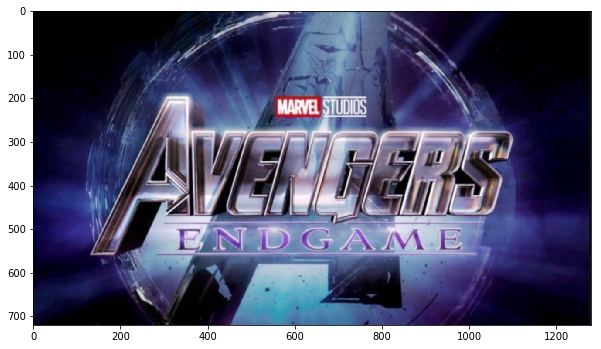

In [63]:
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis()
plt.show()

In [64]:
img.shape

(720, 1280, 3)

In [65]:
X = img.reshape((-1,3))
print(X.shape)

(921600, 3)


In [84]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 20)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
centers = km.cluster_centers_

In [86]:
print(centers)

[[ 172.50880967  173.47977996  199.32793225]
 [   5.53706119    3.2098389    30.13269467]
 [  75.17018631   85.48937563  140.16178716]
 [ 112.49989794  133.16579068  175.81617084]
 [  33.31669343   27.15359085   77.76119484]
 [   1.35149015    0.68757983    5.02796035]
 [  70.01884979   58.73214814   76.61919722]
 [  60.38681618   63.12298044  120.52781321]
 [  44.12596      34.02088784   44.09688581]
 [ 230.52506238  225.07703157  237.46126722]
 [  87.6709017   110.69912253  157.4646497 ]
 [ 126.36739706  114.04923443  140.05222764]
 [ 134.29147982  159.11267187  192.95869094]
 [  44.60856775   43.80555213  101.16214264]
 [ 155.00386733  141.64079158  166.95606578]
 [  76.5582245   154.61411692  184.86637127]
 [  99.31372891   86.74756943  106.64773074]
 [  17.8599974    12.27894053   56.40742664]
 [ 161.70770771   40.73373373   57.58008008]
 [ 195.32016598  197.14499353  217.57396529]]


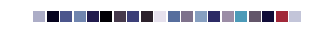

In [89]:
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,25,i+1)
    colors.append(color)
    
    square = np.zeros((100,100,3) , dtype = 'uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")

In [90]:
np.unique(km.labels_,return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 array([ 36712, 108865,  45924,  39151,  74078, 150320,  27073,  56425,
         23684,  18441,  43835,  26034,  33717,  56719,  28725,  12864,
         22933,  76986,   1998,  37116]))

In [91]:
labels = km.labels_

In [92]:
new_img = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]
    
print(new_img.shape)

(921600, 3)


In [93]:
new_img = new_img.reshape(img.shape)

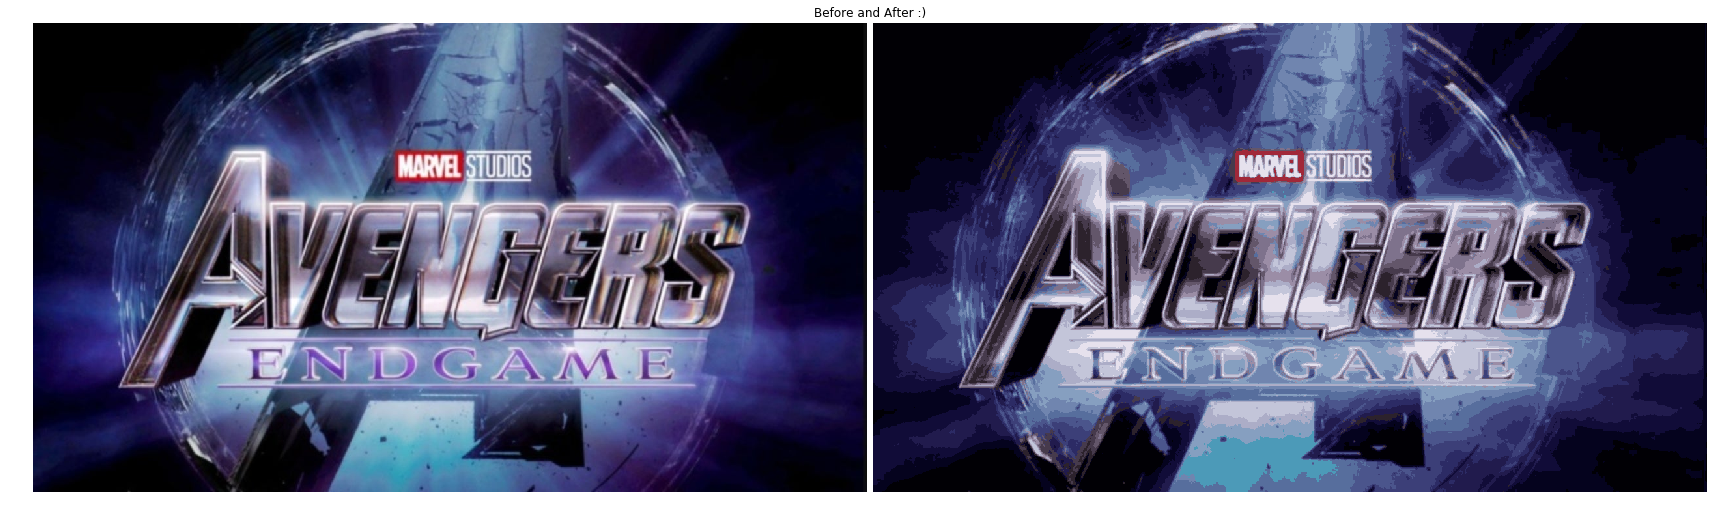

In [94]:
new_img = new_img/255
plt.figure(figsize = (30,30))
plt.imshow(np.hstack((img/255,np.ones((720,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()